In [16]:
# installing the Kaggle library
!pip install kaggle

In [17]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Importing Dogs vs Cat Data

In [18]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  sampleSubmission.csv  test1.zip  train  train.zip


In [20]:
# extracting the compressed data
from zipfile import ZipFile

with ZipFile('dogs-vs-cats.zip','r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [21]:
# extracting the train_zip data
from zipfile import ZipFile

with ZipFile('train.zip','r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [22]:
import os
#count the number of files
path, dir , files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: '+ str(file_count))

Number of images: 25000


Printing the number of images

In [23]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.8971.jpg', 'cat.1682.jpg', 'cat.4860.jpg', 'dog.4667.jpg', 'cat.3813.jpg', 'cat.2801.jpg', 'cat.3303.jpg', 'dog.4498.jpg', 'cat.11834.jpg', 'cat.736.jpg', 'cat.9121.jpg', 'cat.11232.jpg', 'cat.1634.jpg', 'cat.2928.jpg', 'cat.3255.jpg', 'cat.10508.jpg', 'dog.4988.jpg', 'dog.4287.jpg', 'dog.10533.jpg', 'cat.6373.jpg', 'cat.12280.jpg', 'dog.4869.jpg', 'cat.7166.jpg', 'dog.9434.jpg', 'dog.1115.jpg', 'cat.8939.jpg', 'cat.9401.jpg', 'dog.6821.jpg', 'cat.2131.jpg', 'cat.8738.jpg', 'dog.9677.jpg', 'dog.1110.jpg', 'dog.10882.jpg', 'dog.8340.jpg', 'dog.5593.jpg', 'cat.11682.jpg', 'cat.6950.jpg', 'dog.5958.jpg', 'dog.11931.jpg', 'dog.1065.jpg', 'dog.1754.jpg', 'cat.5689.jpg', 'cat.4104.jpg', 'cat.4415.jpg', 'dog.9674.jpg', 'cat.11623.jpg', 'cat.3.jpg', 'cat.2323.jpg', 'cat.4707.jpg', 'dog.2224.jpg', 'dog.11719.jpg', 'dog.3734.jpg', 'dog.8369.jpg', 'cat.854.jpg', 'dog.9479.jpg', 'dog.4719.jpg', 'dog.10929.jpg', 'dog.881.jpg', 'dog.5314.jpg', 'cat.1462.jpg', 'cat.1296.jpg', 'dog.2862.jpg', 'd

### Importing Libraries

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

## display images of dog and cat image

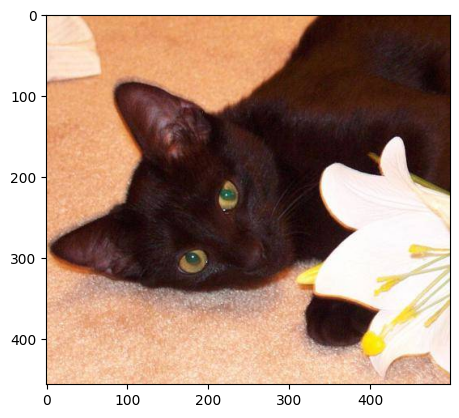

In [25]:
cimg = mpimg.imread('/content/train/cat.8971.jpg')
cimgplot=plt.imshow(cimg)
plt.show()

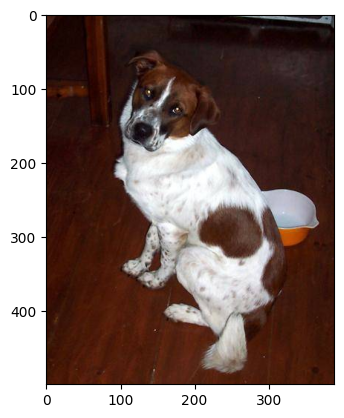

In [26]:
dimg = mpimg.imread('/content/train/dog.4667.jpg')
dimgplot=plt.imshow(dimg)
plt.show()

In [30]:
# number of dog or cat images
d_cnt=0
c_cnt=0
for img_file in file_names:
  if img_file[0:3]=='cat':
    c_cnt=c_cnt+1
  else:
    d_cnt=d_cnt+1
print('number of dog or cat images respectively:'+str(c_cnt) +' and '+str(d_cnt) )

number of dog or cat images respectively:12500 and 12500


## Resizing the Images

In [64]:
#creating directory for resized images
#os.mkdir('/content/image_resized_final')
os.mkdir('/content/image_resized_final_2000_img')

In [65]:
orig_folder = '/content/train/'
resized_folder = '/content/image_resized_final_2000_img/'

In [66]:
#2 min 12 sec
file_name=os.listdir(orig_folder)
#for i in range(2000):
for i in range(2000):
  img_path = orig_folder+ file_name[i]
  img= Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  img.save(resized_folder+ file_name[i])

In [67]:
file_names = os.listdir(resized_folder)
print(file_names)
# number of dog or cat images
d_cnt=0
c_cnt=0
for img_file in file_names:
  if img_file[0:3]=='cat':
    c_cnt=c_cnt+1
  else:
    d_cnt=d_cnt+1
print('number of dog or cat images respectively:'+str(c_cnt) +' and '+str(d_cnt) )

['cat.8971.jpg', 'cat.1682.jpg', 'cat.4860.jpg', 'dog.4667.jpg', 'cat.3813.jpg', 'cat.2801.jpg', 'cat.3303.jpg', 'dog.4498.jpg', 'cat.11834.jpg', 'cat.736.jpg', 'cat.9121.jpg', 'cat.11232.jpg', 'cat.1634.jpg', 'cat.2928.jpg', 'cat.3255.jpg', 'cat.10508.jpg', 'dog.4988.jpg', 'dog.4287.jpg', 'dog.10533.jpg', 'cat.6373.jpg', 'cat.12280.jpg', 'dog.4869.jpg', 'cat.7166.jpg', 'dog.9434.jpg', 'dog.1115.jpg', 'cat.8939.jpg', 'cat.9401.jpg', 'dog.6821.jpg', 'cat.2131.jpg', 'cat.8738.jpg', 'dog.9677.jpg', 'dog.1110.jpg', 'dog.10882.jpg', 'dog.8340.jpg', 'dog.5593.jpg', 'cat.11682.jpg', 'cat.6950.jpg', 'dog.5958.jpg', 'dog.11931.jpg', 'dog.1065.jpg', 'dog.1754.jpg', 'cat.5689.jpg', 'cat.4104.jpg', 'cat.4415.jpg', 'dog.9674.jpg', 'cat.11623.jpg', 'cat.3.jpg', 'cat.2323.jpg', 'cat.4707.jpg', 'dog.2224.jpg', 'dog.11719.jpg', 'dog.3734.jpg', 'dog.8369.jpg', 'cat.854.jpg', 'dog.9479.jpg', 'dog.4719.jpg', 'dog.10929.jpg', 'dog.881.jpg', 'dog.5314.jpg', 'cat.1462.jpg', 'cat.1296.jpg', 'dog.2862.jpg', 'd

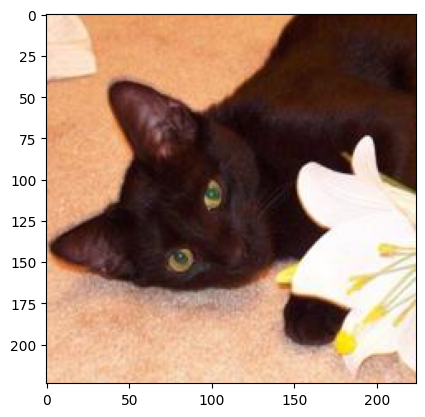

In [68]:
cimg = mpimg.imread(resized_folder+'cat.8971.jpg')
cimgplot=plt.imshow(cimg)
plt.show()

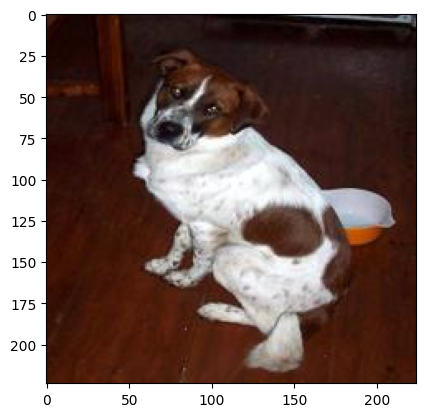

In [69]:
dimg = mpimg.imread(resized_folder+'dog.4667.jpg')
dimgplot=plt.imshow(dimg)
plt.show()

## Creating a label

Cat --> 0

Dog --> 1

In [70]:
file_names = os.listdir(resized_folder)
print(file_names)
# number of dog or cat images
d_cnt=0
c_cnt=0
label_list=[]
for img_file in file_names:
  if img_file[0:3]=='cat':
    label_list.append(0)
  else:
    label_list.append(1)
print(label_list)

['cat.8971.jpg', 'cat.1682.jpg', 'cat.4860.jpg', 'dog.4667.jpg', 'cat.3813.jpg', 'cat.2801.jpg', 'cat.3303.jpg', 'dog.4498.jpg', 'cat.11834.jpg', 'cat.736.jpg', 'cat.9121.jpg', 'cat.11232.jpg', 'cat.1634.jpg', 'cat.2928.jpg', 'cat.3255.jpg', 'cat.10508.jpg', 'dog.4988.jpg', 'dog.4287.jpg', 'dog.10533.jpg', 'cat.6373.jpg', 'cat.12280.jpg', 'dog.4869.jpg', 'cat.7166.jpg', 'dog.9434.jpg', 'dog.1115.jpg', 'cat.8939.jpg', 'cat.9401.jpg', 'dog.6821.jpg', 'cat.2131.jpg', 'cat.8738.jpg', 'dog.9677.jpg', 'dog.1110.jpg', 'dog.10882.jpg', 'dog.8340.jpg', 'dog.5593.jpg', 'cat.11682.jpg', 'cat.6950.jpg', 'dog.5958.jpg', 'dog.11931.jpg', 'dog.1065.jpg', 'dog.1754.jpg', 'cat.5689.jpg', 'cat.4104.jpg', 'cat.4415.jpg', 'dog.9674.jpg', 'cat.11623.jpg', 'cat.3.jpg', 'cat.2323.jpg', 'cat.4707.jpg', 'dog.2224.jpg', 'dog.11719.jpg', 'dog.3734.jpg', 'dog.8369.jpg', 'cat.854.jpg', 'dog.9479.jpg', 'dog.4719.jpg', 'dog.10929.jpg', 'dog.881.jpg', 'dog.5314.jpg', 'cat.1462.jpg', 'cat.1296.jpg', 'dog.2862.jpg', 'd

In [71]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(label_list, return_counts=True)
print(values)
print(counts)

[0 1]
[1059  941]


## Converting all the resized images to numpy array

In [72]:
import cv2
import glob
###In Python, the glob module is used to retrieve files/pathnames matching a specified pattern.

In [73]:
#34 sec
image_directory = resized_folder
image_extension=['png','jpg','jpeg']

files=[]

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]  ###

dog_cat_images = np.asarray([cv2.imread(file) for file in files ])

In [ ]:
print(dog_cat_images)


In [74]:
print(type(dog_cat_images))
print(dog_cat_images.shape)

<class 'numpy.ndarray'>
(2000, 224, 224, 3)


In [75]:
X = dog_cat_images
Y = np.asarray(label_list)

### Train Test Split

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [78]:
X_train_scaled= X_train/255
X_test_scaled= X_test/255

In [79]:
print(X_train_scaled)

[[[[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  ...

  [[1.         0.99607843 0.99607843]
   [1.         0.99607843 0.99607843]
   [1.         0.99607843 0.99607843]
   ...
   [0.27058824 0.30196078 0.29803922]
   [0.2627451  0.29411765 0.29019608]
   [0.2627451  0.29411765 0.29019608]]

  [[1.         0.99215686 0.99607843]
   [1. 

In [118]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [119]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

### Building the Neural Network

In [120]:
# setting up layers of neural network
num_of_cls = 2

model = keras.Sequential([ pretrained_model , keras.layers.Dense(num_of_cls) ])
    # ouput Layer - 2 cause there is 2 class (Cat vs Dog  )

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [122]:
# from_logits = True is important
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required. The advantage of using "categorical_crossentropy" is that it can give you class probabilities, which might be useful in some cases.

Accuracy on Train Data

In [123]:
## training the network (1 min)

Digit_NN=model.fit(X_train_scaled, Y_train, epochs=5) #epochs is how many times data will go through the model


Epoch 1/5
50/50 [==============================] - 59s 1s/step - loss: 0.2025 - acc: 0.9169
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.0805 - acc: 0.9681
Epoch 3/5
50/50 [==============================] - 53s 1s/step - loss: 0.0605 - acc: 0.9762
Epoch 4/5
50/50 [==============================] - 48s 958ms/step - loss: 0.0506 - acc: 0.9844
Epoch 5/5
50/50 [==============================] - 50s 994ms/step - loss: 0.0449 - acc: 0.9856


In [124]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print(loss,accuracy)

13/13 [==============================] - 13s 882ms/step - loss: 0.0528 - acc: 0.9750
0.05275673046708107 0.9750000238418579


## Final Whole Code - Recognition Sytem

(1080, 1920, 3)


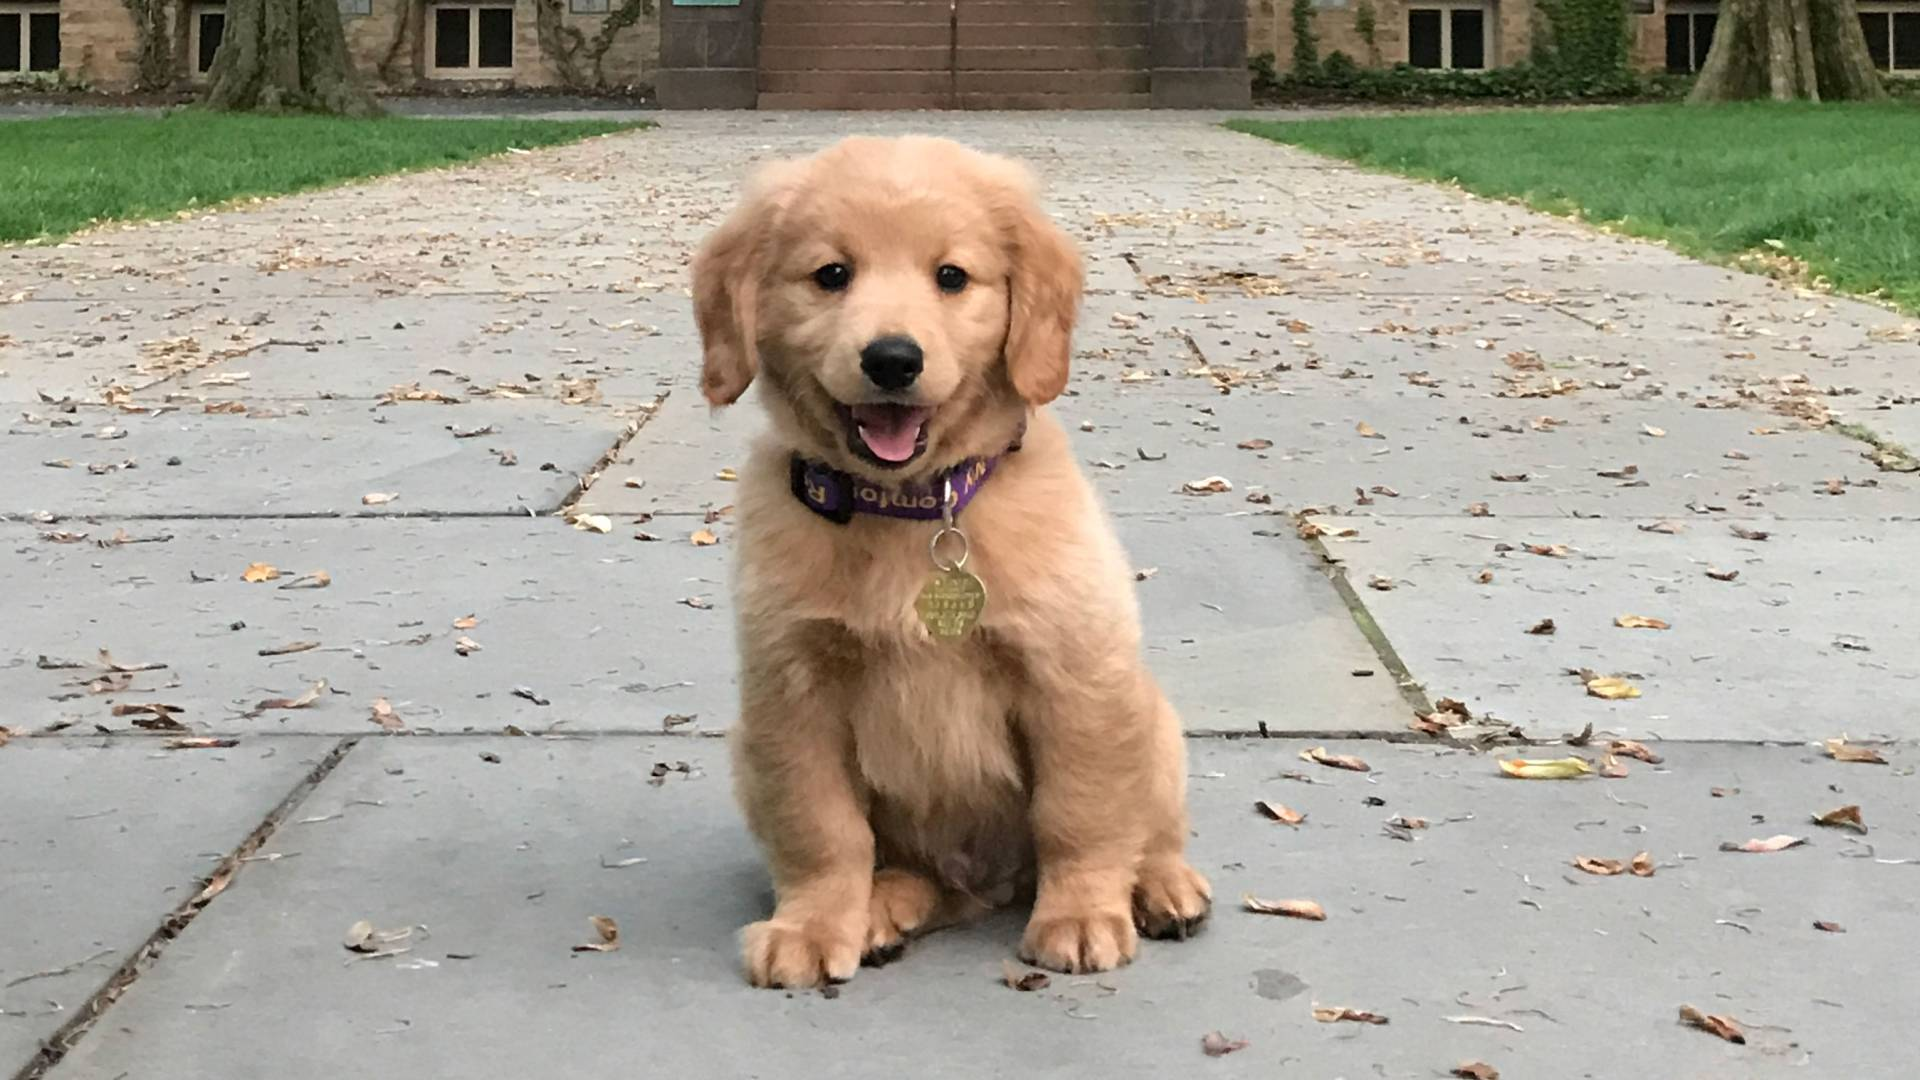

(224, 224, 3)


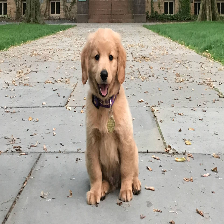

1/1 [==============================] - 0s 101ms/step
[[-2.9330082  3.143159 ]]
[-2.933, 3.143]
Digit Classified is : 1
Dog Image


In [138]:
#input_image_path= input('Path of the Image to be predicted')
input_image_path= ('dog3.jpg')
input_img=cv2.imread(input_image_path)
print(input_img.shape)
cv2_imshow(input_img)
input_res = cv2.resize(input_img,(224,224))
print(input_res.shape)
cv2_imshow(input_res)
input_res= input_res/255
reshaped_input_res = np.reshape(input_res, [1,224,224 ,3]) ## Reshaping RGB Image
input_prediction=model.predict(reshaped_input_res)
print(input_prediction)
print([round(i,3) for i  in input_prediction[0]])
prediction=[np.argmax(input_prediction)]
print('Digit Classified is : '+ str(prediction[0]))
if(prediction[0]==1):
  print('Dog Image')
else:
  print('Cat Image')